# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources in the README.md file
- Happy learning!

In [47]:
# Importing all the datasets needed for this lab 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.datasets import *

# Setting the style 'ggplot' for matplotlib graphs and figures 
plt.style.use('ggplot')

# Challenge 1 - Explore the Scikit-Learn Datasets

Before starting to work on our own datasets, let's first explore the datasets that are included in this Python library. These datasets have been cleaned and formatted for use in ML algorithms.

First, we will load the diabetes dataset. Do this in the cell below by importing the datasets and then loading the dataset  to the `diabetes` variable using the `load_diabetes()` function ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html)).

In [6]:
# Loading the diabetes dataset, that is included inside the Sklearn library 
diabetes = load_diabetes()

Let's explore this variable by looking at the different attributes (keys) of `diabetes`. Note that the `load_diabetes` function does not return dataframes. It returns you a Python dictionary.

In [8]:
# Taking a look at the keys of the diabetes dataset keys, to know which are the features we can take a look at 
diabetes.keys()


dict_keys(['data', 'target', 'DESCR', 'feature_names', 'data_filename', 'target_filename'])

In [11]:
diabetes['feature_names']

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

#### The next step is to read the description of the dataset. 

Print the description in the cell below using the `DESCR` attribute of the `diabetes` variable. Read the data description carefully to fully understand what each column represents.

*Hint: If your output is ill-formatted by displaying linebreaks as `\n`, it means you are not using the `print` function.*

In [13]:
print(diabetes['DESCR'])

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - Age
      - Sex
      - Body mass index
      - Average blood pressure
      - S1
      - S2
      - S3
      - S4
      - S5
      - S6

Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).

Source URL:
https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html

For more information see:
Bra

#### Based on the data description, answer the following questions:

1. How many attributes are there in the data? What do they mean?

1. What is the relation between `diabetes['data']` and `diabetes['target']`?

1. How many records are there in the data?

**1.How many attributes are there in the data? What do they mean?**
There are 10 attributes in the data: `Age`, `Sex`, `BMI`, `Average Blood Pressure`(written as 'bp'), and six blood serum measurements (S1,S2,S3,S4,S5,S6) 

**2. What's the relation between diabetes['data'], and diabetes['target']?**

diabetes['data'] is the dataset that cointains all the features (the first 10 columns mentioned above), while diabetes['target'] is the target column, that contain the outcome of our model ('diabetes progression measurement)

**3.How many records are there in the data?**
There are a total amount of 442 records, one for patient. 



#### Now explore what are contained in the *data* portion as well as the *target* portion of `diabetes`. 

Scikit-learn typically takes in 2D numpy arrays as input (though pandas dataframes are also accepted). Inspect the shape of `data` and `target`. Confirm they are consistent with the data description.

In [16]:
# Checking the shape of the data dictionary inside diabetes dataset. 
diabetes['data'].shape


(442, 10)

In [19]:
# Checking the shape of the target dictionary inside diabetes dataset. 
diabetes['target'].shape

(442,)

As we have told before, these two columns are consistent in terms of shape. 

`diabetes['data']` → contains 442 observations for 442 patients and each observation has 10 features

`diabetes['target']` → contains 442 observations for 442 patients and only one column that is the outcome we want to predict with our model.


# Challenge 2 - Perform Supervised Learning on the Dataset

The data have already been split to predictor (*data*) and response (*target*) variables. Given this information, we'll apply what we have previously learned about linear regression and apply the algorithm to the diabetes dataset.

#### Let's briefly revisit the linear regression formula:

```
y = β0 + β1X1 + β2X2 + ... + βnXn + ϵ
```

...where:

- X1-Xn: data 
- β0: intercept 
- β1-βn: coefficients 
- ϵ: error (cannot explained by model)
- y: target

Also take a look at the `sklearn.linear_model.LinearRegression` [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html).

#### In the cell below, import the `linear_model` class from `sklearn`. 

In [20]:
# Importing all the required libraries to create a Linear Regression Model from Sklearn 
from sklearn.linear_model import LinearRegression

#### Create a new instance of the linear regression model and assign the new instance to the variable `diabetes_model`.

In [21]:
# Creating the instance for the Linear Regression Model 
diabetes_model = LinearRegression()

#### Next, let's split the training and test data.

Define `diabetes_data_train`, `diabetes_target_train`, `diabetes_data_test`, and `diabetes_target_test`. Use the last 20 records for the test data and the rest for the training data.

In [34]:
# Splitting the diabetes dataset into four groups data train and test, target train and test. 
# Since we will use 20 records for test and the dataset shape is 442, 422 record will become our train dataset. 

# Our diabetes data train set will contain all the observations except the last 20. 
diabetes_data_train = diabetes['data'][:-20]

# Same for target train dataset. 
diabetes_target_train = diabetes['target'][:-20]

# Our diabetes data test dataset will contain the last 20 observations 
diabetes_data_test = diabetes['data'][-20:]

# Same for the target test 
diabetes_target_test = diabetes['target'][-20:]


Fit the training data and target to `diabetes_model`. Print the *intercept* and *coefficients* of the model.

In [35]:
# Fitting the diabetes model using our training data. 
diabetes_model.fit(diabetes_data_train, diabetes_target_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [36]:
# Calculate the coefficients of the regression model 
diabetes_model.coef_

array([ 3.03499549e-01, -2.37639315e+02,  5.10530605e+02,  3.27736980e+02,
       -8.14131709e+02,  4.92814588e+02,  1.02848452e+02,  1.84606489e+02,
        7.43519617e+02,  7.60951722e+01])

In [37]:
# we calculate the intercept value of our regression line model.
diabetes_model.intercept_

152.76430691633442

#### Inspecting the results

From the outputs you should have seen:

- The intercept is a float number.
- The coefficients are an array containing 10 float numbers.

This is the linear regression model fitted to your training dataset.

#### Using your fitted linear regression model, predict the *y* of `diabetes_data_test`.

In [45]:
# Predicting the value of our linear regression model 
y_pred = diabetes_model.predict(diabetes_data_test)

In [51]:
y_pred

array([197.61846908, 155.43979328, 172.88665147, 111.53537279,
       164.80054784, 131.06954875, 259.12237761, 100.47935157,
       117.0601052 , 124.30503555, 218.36632793,  61.19831284,
       132.25046751, 120.3332925 ,  52.54458691, 194.03798088,
       102.57139702, 123.56604987, 211.0346317 ,  52.60335674])

#### Print your `diabetes_target_test` and compare with the prediction. 

In [39]:
# Printing our diabetes target test values
print(diabetes_target_test)

[233.  91. 111. 152. 120.  67. 310.  94. 183.  66. 173.  72.  49.  64.
  48. 178. 104. 132. 220.  57.]


In [43]:
# Checking the shape of our diabetes target test data 
diabetes_target_test.shape[0]

20

#### Is `diabetes_target_test` exactly the same as the model prediction? Explain.

Text(0.5, 1.0, 'Scatter plot for diabetes target test and predicted values')

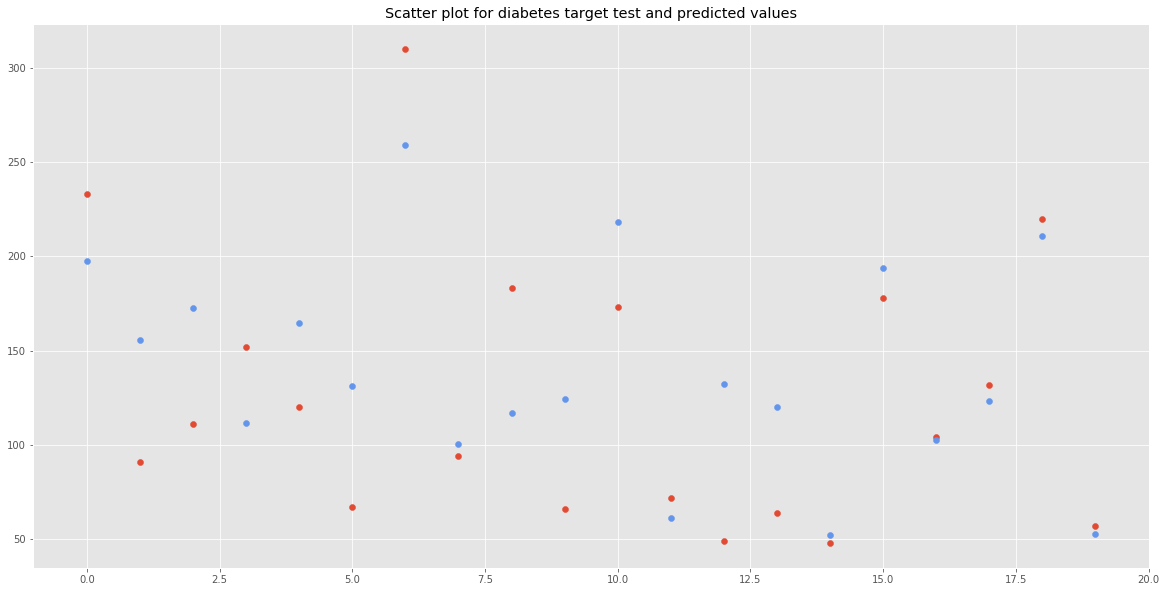

In [52]:
# Setting the figure and creating a figure with figure size (20,10)
plt.figure(figsize=(20,10))

# In the same figure, we will plot the diabetes target test data and the y_predicted 20 values. 

# Plotting diabetes target test observations 
plt.scatter(range(diabetes_target_test.shape[0]), diabetes_target_test)

# Plotting diabetes y predicted values. 
plt.scatter(range(y_pred.shape[0]), y_pred, color='cornflowerblue')

# Setting aesthetics of the figure 
plt.title('Scatter plot for diabetes target test and predicted values' )

# Bonus Challenge 1 - Hypothesis Testing with `statsmodels`

After generating the linear regression model from the dataset, you probably wonder: then what? What is the statistical way to know if my model is reliable or not?

Good question. We'll discuss that using Scikit-Learn in Challenge 5. But for now, let's use a fool-proof way by using the ([Linear Regression class of StatsModels](https://www.statsmodels.org/dev/regression.html)) which can also conduct linear regression analysis plus much more such as calcuating the F-score of the linear model as well as the standard errors and t-scores for each coefficient. The F-score and t-scores will tell you whether you can trust your linear model.

To understand the statistical meaning of conducting hypothesis testing (e.g. F-test, t-test) for slopes, read [this webpage](https://onlinecourses.science.psu.edu/stat501/node/297/) at your leisure time. We'll give you a brief overview next.

* The F-test of your linear model is to verify whether at least one of your coefficients is significantly different from zero. Translating that into the *null hypothesis* and *alternative hypothesis*, that is:

    ```
    H0 : β1 = β2 = ... = β10 = 0
    HA : At least one βj ≠ 0 (for j = 1, 2, ..., 10)
    ```

* The t-tests on each coefficient is to check whether the confidence interval for the variable contains zero. If the confidence interval contains zero, it means the null hypothesis for that variable is not rejected. In other words, this particular vaiable is not contributing to your linear model and you can remove it from your formula.

Read the documentations of [StatsModels Linear Regression](https://www.statsmodels.org/dev/regression.html) as well as its [`OLS` class](https://www.statsmodels.org/dev/generated/statsmodels.regression.linear_model.OLS.html) which stands for *ordinary least squares*.

#### In the next cell, analyze `diabetes_data_train` and `diabetes_target_train` with the linear regression model of `statsmodels`. Print the fit summary.

Your output should look like:

![statsmodels regression](../images/statsmodels.png)

In [55]:
# Importing the required library to implement the hypotheses testing. 
import statsmodels.api as sm

# Creating the model using statsmodel and passing as a parameters the y_train_column and the X_train_matrix 
mod = sm.OLS(diabetes_target_train, diabetes_data_train)

# Fitting the model 
res = mod.fit()

# Printing the results summary 
print(res.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.110
Model:                            OLS   Adj. R-squared (uncentered):              0.089
Method:                 Least Squares   F-statistic:                              5.109
Date:                Mon, 12 Aug 2019   Prob (F-statistic):                    4.77e-07
Time:                        12:58:22   Log-Likelihood:                         -2745.5
No. Observations:                 422   AIC:                                      5511.
Df Residuals:                     412   BIC:                                      5552.
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

#### Interpreting hypothesis testing results

Answer the following questions in the cell below:

1. What is the F-score of your linear model and is the null hypothesis rejected?

1. Does any of the t-tests of the coefficients produce a confidence interval containing zero? What are they?

1. How will you modify your linear reguression model according to the test results above?

**1.What is the F-score of your linear model and is the null hypothesis rejected?**

The F-Score of the model is 5.109. Then, by considering an alpha of 5%, we can calculate the probability of this F-score statistic. In this case, as can be seen in the summary, the probability of this F-score statistic is 4.77e-7, that means that is much lower that our alpha= 0.05. Saying this, we can reject our null hypotheses, and we can say that at least one of our coefficients is signifficantly different from 0. 


**2.Does any of the t-tests of the coefficients produce a confidence interval containing zero? What are they?**
All of the t-tests except x3 for the coefficients have a CI containing 0. 
- Age x1
- Sex x2

~~Body mass index x3~~
- Average blood pressure x4
- S1 x5
- S2 x6
- S3 x7
- S4 x8
- S5 x9
- S6 x10


**3. How will you modify your linear regression model according to the test results above?**
According to the summary we have, mostly all of the variables have a p-value greater than 0.05, meaning that they are not significant. In other words, we could say that a larger (insignificant) p-value suggests that changes in the predictor are not associated with changes in the response.

One idea could be to assess if some of our variables are extremely correlated. If it is like this, then we could try to remove one variable and fit the model again. This is the so-called backward elimination. 

Also, we could start removing the variable with the greatest p-value and fit the model again. We should see that also the R2score increases. 


# Challenge 3 - Peform Supervised Learning on a Pandas Dataframe

Now that we have dealt with data that has been formatted for scikit-learn, let's look at data that we will need to format ourselves.

In the next cell, load the `auto-mpg.csv` file included in this folder and assign it to a variable called `auto`.

In [ ]:
# Your code here:


Look at the first 5 rows using the `head()` function:

In [ ]:
# Your code here:


Evaluate the data to ensure that all numeric columns are correctly detected as such by pandas. If a column is misclassified as object, coerce it to numeric.

In [ ]:
# Your code here:


What is the newest model year and the oldest model year?

In [ ]:
# Your code here:


Check the dataset for missing values and remove all rows containing at least one missing value.

In [ ]:
# Your code here:


Find the frequency table for the `cylinders` column using the `value_counts()` function. How many possible values of cylinders are there?

In [ ]:
# Your code here:


We would like to generate a linear regression model that will predict mpg. To do this, first drop the `car_name` column since it does not contain any quantitative data. Next separate the dataframe to predictor and response variables. Separate those into test and training data with 80% of the data in the training set and the remainder in the test set. 

Assign the predictor and response training data to `X_train` and `y_train` respectively. Similarly, assign the predictor and response test data to `X_test` and `y_test`.

*Hint: To separate data for training and test, use the `train_test_split` method we used in previous labs.*

In [ ]:
# Your code here:


Now we will processed and peform linear regression on this data to predict the mpg for each vehicle. 

#### In the next cell, create an instance of the linear regression model and call it `auto_model`. Fit `auto_model` with your training data.

In [ ]:
# Your code here:


# Challenge 4 - Evaluate the Model

In addition to evaluating your model with F-test and t-test, you can also use the *Coefficient of Determination* (a.k.a. *r squared score*). This method does not simply tell *yes* or *no* about the model fit but instead indicates how much variation can be explained by the model. Based on the r squared score, you can decide whether to improve your model in order to obtain a better fit.

You can learn about the r squared score [here](). Its formula is:

![R Squared](../images/r-squared.png)

...where:

* yi is an actual data point.
* ŷi is the corresponding data point on the estimated regression line.

By adding the squares of the difference between all yi-ŷi pairs, we have a measure called SSE (*error sum of squares*) which is an application of the r squared score to indicate the extent to which the estimated regression model is different from the actual data. And we attribute that difference to the random error that is unavoidable in the real world. Obviously, we want the SSE value to be as small as possible.

#### In the next cell, compute the predicted *y* based on `X_train` and call it `y_pred`. Then calcualte the r squared score between `y_pred` and `y_train` which indicates how well the estimated regression model fits the training data.

*Hint: r squared score can be calculated using `sklearn.metrics.r2_score` ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html)).*

In [ ]:
# Your code here:


#### Our next step is to evaluate the model using the test data. 

We would like to ensure that our model is not overfitting the data. This means that our model was made to fit too closely to the training data by being overly complex. If a model is overfitted, it is not generalizable to data outside the training data. In that case, we need to reduce the complexity of the model by removing certain features (variables).

In the cell below, use the model to generate the predicted values for the test data and assign them to `y_test_pred`. Compute the r squared score of the predicted `y_test_pred` and the oberserved `y_test` data.

In [ ]:
# Your code here:


#### Explaining the results

The r squared scores of the training data and the test data are pretty close (0.8146 vs 0.7818). This means our model is not overfitted. However, there is still room to improve the model fit. Move on to the next challenge.

# Challenge 5 - Improve the Model Fit

While the most common way to improve the fit of a model is by using [regularization](https://datanice.github.io/machine-learning-101-what-is-regularization-interactive.html), there are other simpler ways to improve model fit. The first is to create a simpler model. The second is to increase the train sample size.

Let us start with the easier option and increase our train sample size to 90% of the data. Create a new test train split and name the new predictors and response variables `X_train09`, `X_test09`, `y_train09`, `y_test09`.

In [ ]:
# Your code here:


Initialize a new linear regression model. Name this model `auto_model09`. Fit the model to the new sample (training) data.

In [ ]:
# Your code here:


Compute the predicted values and r squared score for our new model and new sample data.

In [ ]:
# Your code here:


Compute the r squared score for the smaller test set. Is there an improvement in the test r squared?

In [ ]:
# Your code here:


# Bonus Challenge 2 - Backward Elimination 

The main way to produce a simpler linear regression model is to reduce the number of variables used in the model. In scikit-learn, we can do this by using recursive feature elimination. You can read more about RFE [here](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html).

In the next cell, we will import RFE

In [ ]:
from sklearn.feature_selection import RFE

Follow the documentation and initialize an RFE model using the `auto_model` linear regression model. Set `n_features_to_select=3`

In [ ]:
# Your code here:


Fit the model and print the ranking

In [ ]:
# Your code here:


Feature importance is ranked from most important (1) to least important (4). Generate a model with the three most important features. The features correspond to variable names. For example, feature 1 is `cylinders` and feature 2 is `displacement`.

Perform a test-train split on this reduced column data and call the split data `X_train_reduced`, `X_test_reduced`, `y_test_reduced`, `y_train_reduced`. Use an 80% split.

In [ ]:
# Your code here:


Generate a new model called `auto_model_reduced` and fit this model. Then proceed to compute the r squared score for the model. Did this cause an improvement in the r squared score?

In [ ]:
# Your code here: 


#### Conclusion

You may obtain the impression from this lab that without knowing statistical methods in depth, it is difficult to make major progress in machine learning. That is correct. If you are motivated to become a data scientist, statistics is the subject you must be proficient in and there is no shortcut. 

Completing these labs is not likely to make you a data scientist. But you will have a good sense about what are there in machine learning and what are good for you. In your future career, you can choose one of the three tracks:

* Data scientists who need to be proficient in statistical methods.

* Data engineers who need to be good at programming.

* Data integration specialists who are business or content experts but also understand data and programming. This cross-disciplinary track brings together data, technology, and business and will be in high demands in the next decade.